In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()
movies

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


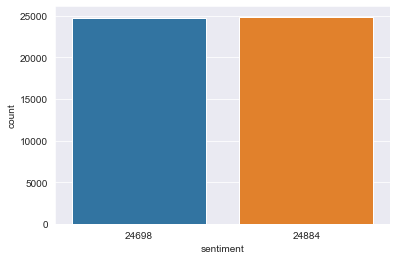

In [47]:
print(sns.countplot(data=movies.sentiment.value_counts(),x=movies.sentiment))
print(movies.sentiment.value_counts())

<AxesSubplot:ylabel='Frequency'>

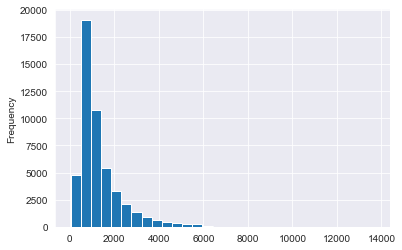

In [2]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist")

In [49]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

In [50]:
print(1310+990)
print(1310-990)

2300
320


In [51]:
movies[movies.length >= ((13704)/3)]

,review,sentiment,length
156,From the film's first shot - Keira Knightley a...,negative,5254
177,"Though I'd heard that ""Cama de Gato"" was the w...",negative,4756
263,"There is a difference between a ""film,"" and a ...",negative,5101
310,"Some people drift through life, moving from on...",positive,5862
320,"""Quitting"" may be as much about exiting a pre-...",positive,5552
...,...,...,...
49803,"There is NOTHING cool, hip, or clever about th...",negative,4778
49833,THE SHOP AROUND THE CORNER is one of the sweet...,positive,6620
49861,"OK OK, it might be hard to put the entirety of...",negative,5452
49948,"It is the early morning of our discontent, and...",negative,5847


In [52]:
import string
from nltk.corpus import stopwords
import nltk 

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    [print(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [54]:
# Check to make sure its working and save it as a column.
# movies["tokens"] = movies['review'].apply(text_process)

One
reviewers
mentioned
watching
1
Oz
episode
youll
hooked
right
exactly
happened
mebr
br
first
thing
struck
Oz
brutality
unflinching
scenes
violence
set
right
word
GO
Trust
show
faint
hearted
timid
show
pulls
punches
regards
drugs
sex
violence
hardcore
classic
use
wordbr
br
called
OZ
nickname
given
Oswald
Maximum
Security
State
Penitentary
focuses
mainly
Emerald
City
experimental
section
prison
cells
glass
fronts
face
inwards
privacy
high
agenda
Em
City
home
manyAryans
Muslims
gangstas
Latinos
Christians
Italians
Irish
moreso
scuffles
death
stares
dodgy
dealings
shady
agreements
never
far
awaybr
br
would
say
main
appeal
show
due
fact
goes
shows
wouldnt
dare
Forget
pretty
pictures
painted
mainstream
audiences
forget
charm
forget
romanceOZ
doesnt
mess
around
first
episode
ever
saw
struck
nasty
surreal
couldnt
say
ready
watched
developed
taste
Oz
got
accustomed
high
levels
graphic
violence
violence
injustice
crooked
guards
wholl
sold
nickel
inmates
wholl
kill
order
get
away
well
mannered

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x0000022006607310>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\nltk\data.py", line 1160, in __del__
    self.close()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nltk\data.py", line 1195, in close
    self.stream.close()
KeyboardInterrupt: 


closet
parents
fighting
timebr
br
movie
slower
soap
opera
suddenly
Jake
decides
become
Rambo
kill
zombiebr
br
OK
first
youre
going
make
film
must
Decide
thriller
drama
drama
movie
watchable
Parents
divorcing
arguing
like
real
life
Jake
closet
totally
ruins
film
expected
see
BOOGEYMAN
similar
movie
instead
watched
drama
meaningless
thriller
spotsbr
br
3
10
well
playing
parents
descent
dialogs
shots
Jake
ignore
Petter
Matteis
Love
Time
Money
visually
stunning
film
watch
Mr
Mattei
offers
us
vivid
portrait
human
relations
movie
seems
telling
us
money
power
success
people
different
situations
encounter
br
br
variation
Arthur
Schnitzlers
play
theme
director
transfers
action
present
time
New
York
different
characters
meet
connect
one
connected
one
way
another
next
person
one
seems
know
previous
point
contact
Stylishly
film
sophisticated
luxurious
look
taken
see
people
live
world
live
habitatbr
br
thing
one
gets
souls
picture
different
stages
loneliness
one
inhabits
big
city
exactly
best
place

In [21]:
movies[0:25000].sentiment.value_counts()

positive    12514
negative    12486
Name: sentiment, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X = movies.review[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.svm import SVC

model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

from sklearn.metrics import classification_report
predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    1.0

Model fitted with testining vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      9935
    positive       0.84      0.83      0.83     10065

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000



In [31]:
from sklearn.model_selection import train_test_split

X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.svm import SVC

model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

from sklearn.metrics import classification_report
predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    1.0

Model fitted with testining vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84     19736
    positive       0.84      0.85      0.85     19930

    accuracy                           0.84     39666
   macro avg       0.84      0.84      0.84     39666
weighted avg       0.84      0.84      0.84     39666



In [32]:
from sklearn.model_selection import train_test_split

X = movies.review[0:10000]
y = movies.sentiment[0:10000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.svm import SVC

model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

from sklearn.metrics import classification_report
predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    1.0

Model fitted with testining vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      1006
    positive       0.85      0.86      0.85       994

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [33]:
from sklearn.model_selection import train_test_split

X = movies.review[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.svm import SVC

model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

from sklearn.metrics import classification_report
predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    0.99995

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      2490
    positive       0.86      0.85      0.86      2510

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [34]:
from sklearn.model_selection import train_test_split

X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.svm import SVC

model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

from sklearn.metrics import classification_report
predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')



    KG:     https://www.youtube.com/watch?v=M9Itm95JzL0   (watched this fully)
    KG:     https://www.youtube.com/watch?v=vyOgWhwUmec
    FCC:    https://www.youtube.com/watch?v=X2vAabgKiuM
    DS:     https://www.youtube.com/watch?v=hHr_cBKkRfQ
    SDX:    https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL
